# 📊 Simple Linear Regression từ đầu

Trong notebook này, chúng ta sẽ:
- Tạo dữ liệu tuyến tính tổng hợp
- Cài đặt và huấn luyện SimpleLinearRegression
- Vẽ đường hồi quy và learning curve
- So sánh với scikit-learn


In [12]:
# Import libraries
import sys
import os
# Sử dụng os.getcwd() thay vì __file__ trong Jupyter notebook
sys.path.append(os.path.join(os.getcwd(), '..'))

import numpy as np
import matplotlib.pyplot as plt
from src.linear_regression import SimpleLinearRegression
from src.data_generator import DataGenerator
from src.visualization import Plotter

# Set random seed for reproducibility
np.random.seed(42)
# Giải thích về Simple Linear Regression:
# 
# Simple Linear Regression là thuật toán học máy cơ bản nhất để dự đoán một biến liên tục
# dựa trên mối quan hệ tuyến tính với một biến đầu vào.
#
# Công thức: y = w*x + b + ε
# - w: trọng số (weight/slope) - độ dốc của đường thẳng
# - b: bias (intercept) - điểm cắt trục y
# - ε: nhiễu (noise)
#
# Mục tiêu: Tìm w và b tối ưu để minimize Mean Squared Error (MSE)
# Cost function: J(w,b) = (1/2m) * Σ(y_pred - y_true)²
#
# Gradient Descent được sử dụng để tối ưu hóa:
# - w = w - α * ∂J/∂w
# - b = b - α * ∂J/∂b
# với α là learning rate

print("🚀 Bắt đầu demo Simple Linear Regression từ đầu!")
print("=" * 50)


🚀 Bắt đầu demo Simple Linear Regression từ đầu!


In [13]:
# Generate synthetic data: y = 2x + 3 + noise
data_gen = DataGenerator(random_state=42)
X, y = data_gen.linear(num_samples=200, weight=2.0, bias=3.0, noise_std=0.5)

print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"y range: [{y.min():.2f}, {y.max():.2f}]")


Data shape: X=(200, 1), y=(200,)
X range: [-9.89, 9.74]
y range: [-17.02, 23.06]


In [14]:
# Train our Linear Regression model
model = SimpleLinearRegression(
    learning_rate=0.05, 
    max_iterations=5000, 
    tolerance=1e-10,
    random_state=42
)

model.fit(X, y, verbose=True)

# Get learned parameters
params = model.get_parameters()
print(f"\nLearned parameters:")
print(f"  Weight: {params['weights'][0]:.4f} (true: 2.0)")
print(f"  Bias: {params['bias']:.4f} (true: 3.0)")
print(f"  R² Score: {model.score(X, y):.4f}")
print(f"  Final Cost: {params['cost_history'][-1]:.6f}")


Iteration 0: Cost = 143.457725
Iteration 100: Cost = 0.233793
Iteration 200: Cost = 0.233457
Converged at iteration 226

Learned parameters:
  Weight: 1.9980 (true: 2.0)
  Bias: 3.0331 (true: 3.0)
  R² Score: 0.9983
  Final Cost: 0.233457


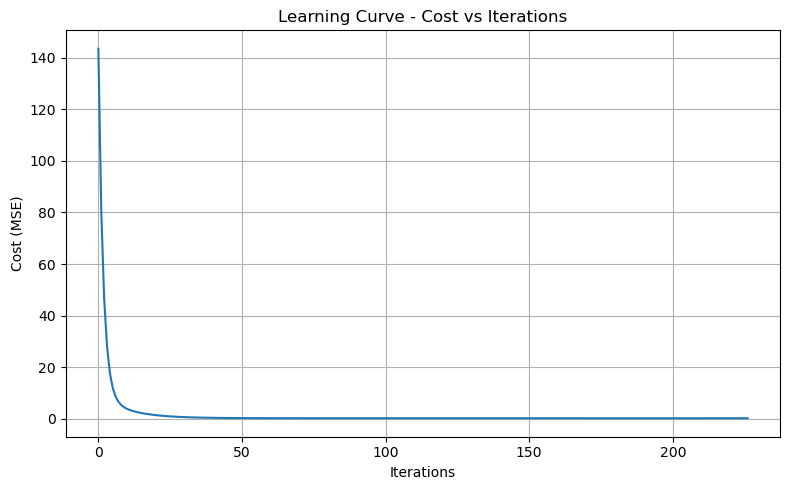

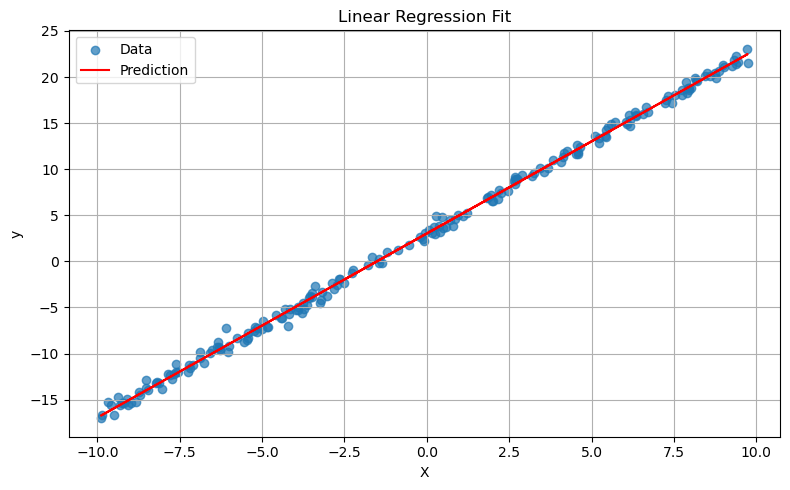

In [15]:
# Visualize results
plotter = Plotter()

# Plot learning curve
plotter.plot_learning_curve(params['cost_history'], "Learning Curve - Cost vs Iterations")

# Plot regression line
plotter.plot_regression_line(X, y, params['weights'], params['bias'], "Linear Regression Fit")


## So sánh với scikit-learn

Bây giờ hãy so sánh implementation của chúng ta với scikit-learn để xem độ chính xác!


In [16]:
# So sánh với scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train scikit-learn model
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

# Predictions
our_predictions = model.predict(X)
sklearn_predictions = sklearn_model.predict(X)

# So sánh parameters
print("🔍 So sánh Parameters")
print("=" * 50)
print(f"Our implementation:")
print(f"  Weight: {params['weights'][0]:.6f}")
print(f"  Bias:   {params['bias']:.6f}")
print()
print(f"Scikit-learn:")
print(f"  Weight: {sklearn_model.coef_[0]:.6f}")
print(f"  Bias:   {sklearn_model.intercept_:.6f}")
print()
print(f"True values:")
print(f"  Weight: 2.000000")
print(f"  Bias:   3.000000")

# So sánh performance
print("\n📊 So sánh Performance")
print("=" * 50)

# Our model metrics
our_mse = mean_squared_error(y, our_predictions)
our_mae = mean_absolute_error(y, our_predictions)
our_r2 = r2_score(y, our_predictions)

# Sklearn model metrics
sklearn_mse = mean_squared_error(y, sklearn_predictions)
sklearn_mae = mean_absolute_error(y, sklearn_predictions)
sklearn_r2 = r2_score(y, sklearn_predictions)

print(f"{'Metric':<15} {'Our Model':<12} {'Sklearn':<12} {'Difference':<12}")
print("-" * 55)
print(f"{'MSE':<15} {our_mse:<12.6f} {sklearn_mse:<12.6f} {abs(our_mse-sklearn_mse):<12.6f}")
print(f"{'MAE':<15} {our_mae:<12.6f} {sklearn_mae:<12.6f} {abs(our_mae-sklearn_mae):<12.6f}")
print(f"{'R²':<15} {our_r2:<12.6f} {sklearn_r2:<12.6f} {abs(our_r2-sklearn_r2):<12.6f}")


🔍 So sánh Parameters
Our implementation:
  Weight: 1.998048
  Bias:   3.033054

Scikit-learn:
  Weight: 1.998048
  Bias:   3.033083

True values:
  Weight: 2.000000
  Bias:   3.000000

📊 So sánh Performance
Metric          Our Model    Sklearn      Difference  
-------------------------------------------------------
MSE             0.233457     0.233457     0.000000    
MAE             0.381405     0.381404     0.000001    
R²              0.998313     0.998313     0.000000    


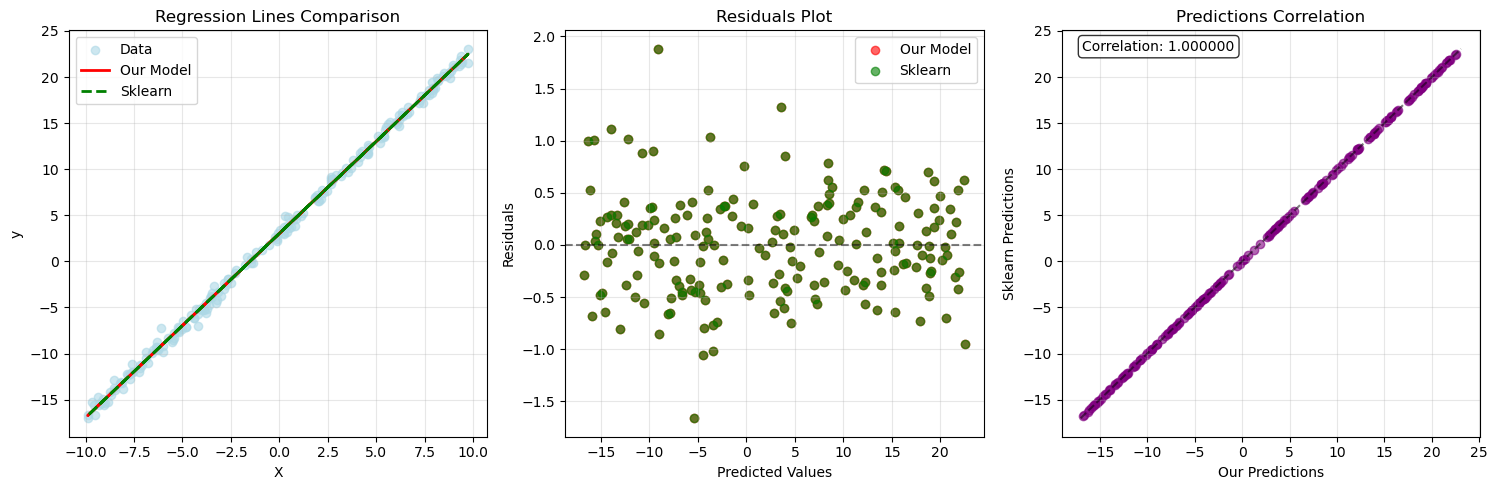


🎯 Kết luận:
Correlation giữa predictions: 1.000000
✅ Excellent! Our implementation matches sklearn very well!


In [17]:
# Visualize comparison
plt.figure(figsize=(15, 5))

# Plot 1: Data và regression lines
plt.subplot(1, 3, 1)
plt.scatter(X, y, alpha=0.6, label='Data', color='lightblue')
plt.plot(X, our_predictions, 'r-', label='Our Model', linewidth=2)
plt.plot(X, sklearn_predictions, 'g--', label='Sklearn', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Lines Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals comparison
plt.subplot(1, 3, 2)
our_residuals = y - our_predictions
sklearn_residuals = y - sklearn_predictions
plt.scatter(our_predictions, our_residuals, alpha=0.6, label='Our Model', color='red')
plt.scatter(sklearn_predictions, sklearn_residuals, alpha=0.6, label='Sklearn', color='green')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Predictions comparison
plt.subplot(1, 3, 3)
plt.scatter(our_predictions, sklearn_predictions, alpha=0.6, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', alpha=0.5)
plt.xlabel('Our Predictions')
plt.ylabel('Sklearn Predictions')
plt.title('Predictions Correlation')
plt.grid(True, alpha=0.3)

# Calculate correlation between predictions
pred_correlation = np.corrcoef(our_predictions, sklearn_predictions)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {pred_correlation:.6f}', 
         transform=plt.gca().transAxes, fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n🎯 Kết luận:")
print(f"Correlation giữa predictions: {pred_correlation:.6f}")
if pred_correlation > 0.999:
    print("✅ Excellent! Our implementation matches sklearn very well!")
elif pred_correlation > 0.99:
    print("✅ Very good! Our implementation is very close to sklearn!")
else:
    print("⚠️  Có thể cần điều chỉnh learning rate hoặc iterations!")


## Thử nghiệm với Learning Rate khác nhau

Hãy xem learning rate ảnh hưởng như thế nào đến convergence!


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/khuongledev/khuongledev-local/ML-Portfolio/03-Linear-Regression-Scratch/notebooks/../src/linear_regression.py:125: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(prev_cost - cost) < self.tolerance:
/Users/khuongledev/khuongledev-local/ML-Portfolio/03-Linear-Regression-Scratch/notebooks/../src/linear_regression.py:66: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred) ** 2)
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/khuongledev/khuongledev-local/ML-Portfolio/03-Linear-Regression-Scratch/notebooks/../src/linear_regression.py:83: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self

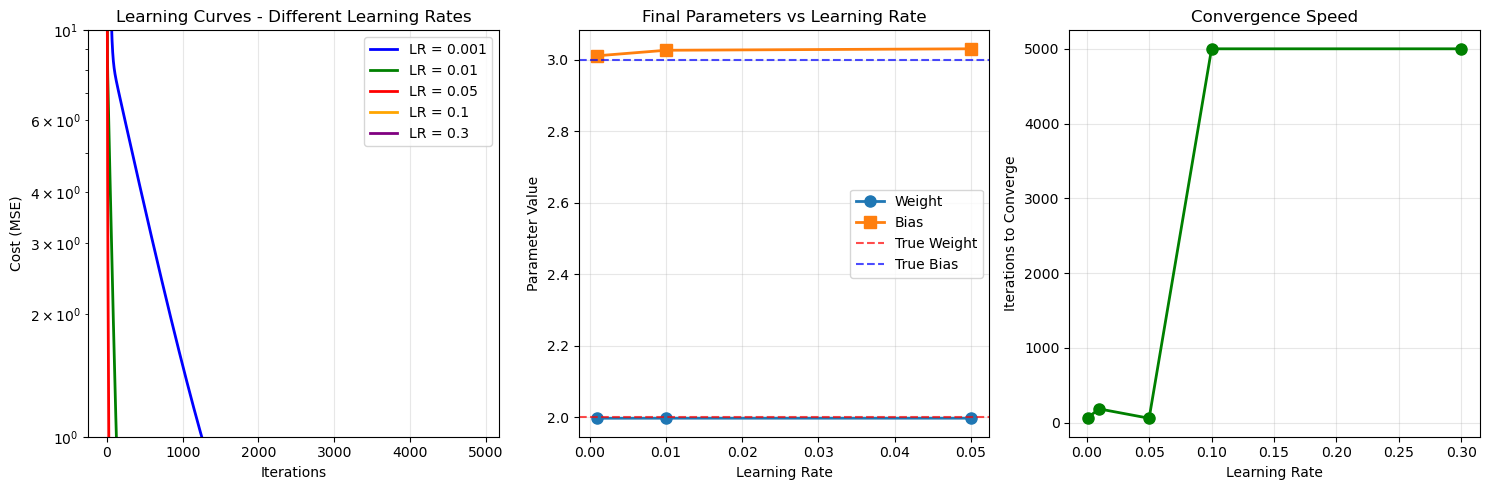

📊 Learning Rate Analysis
LR       Weight     Bias       R²       Converged 
--------------------------------------------------
0.001    1.9978     3.0107     0.9983   69        
0.010    1.9980     3.0261     0.9983   184       
0.050    1.9980     3.0302     0.9983   59        
0.100    nan        nan        nan      5000      
0.300    nan        nan        nan      5000      


In [18]:
# Thử nghiệm với learning rates khác nhau
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.3]
colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(15, 5))

# Plot 1: Learning curves
plt.subplot(1, 3, 1)
for lr, color in zip(learning_rates, colors):
    model_lr = SimpleLinearRegression(learning_rate=lr, max_iterations=5000, random_state=42)
    model_lr.fit(X, y)
    params_lr = model_lr.get_parameters()
    plt.plot(params_lr['cost_history'], color=color, label=f'LR = {lr}', linewidth=2)

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curves - Different Learning Rates')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale để thấy rõ hơn

# Plot 2: Final parameters
plt.subplot(1, 3, 2)
final_weights = []
final_biases = []
for lr in learning_rates:
    model_lr = SimpleLinearRegression(learning_rate=lr, max_iterations=5000, random_state=42)
    model_lr.fit(X, y)
    params_lr = model_lr.get_parameters()
    final_weights.append(params_lr['weights'][0])
    final_biases.append(params_lr['bias'])

plt.plot(learning_rates, final_weights, 'o-', label='Weight', linewidth=2, markersize=8)
plt.plot(learning_rates, final_biases, 's-', label='Bias', linewidth=2, markersize=8)
plt.axhline(y=2.0, color='red', linestyle='--', alpha=0.7, label='True Weight')
plt.axhline(y=3.0, color='blue', linestyle='--', alpha=0.7, label='True Bias')
plt.xlabel('Learning Rate')
plt.ylabel('Parameter Value')
plt.title('Final Parameters vs Learning Rate')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Convergence speed
plt.subplot(1, 3, 3)
convergence_iterations = []
for lr in learning_rates:
    model_lr = SimpleLinearRegression(learning_rate=lr, max_iterations=5000, random_state=42)
    model_lr.fit(X, y)
    params_lr = model_lr.get_parameters()
    
    # Tìm iteration khi cost giảm < 1% so với iteration trước
    cost_history = params_lr['cost_history']
    for i in range(1, len(cost_history)):
        if abs(cost_history[i] - cost_history[i-1]) / cost_history[i-1] < 0.01:
            convergence_iterations.append(i)
            break
    else:
        convergence_iterations.append(len(cost_history))

plt.plot(learning_rates, convergence_iterations, 'o-', linewidth=2, markersize=8, color='green')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Converge')
plt.title('Convergence Speed')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# In kết quả
print("📊 Learning Rate Analysis")
print("=" * 50)
print(f"{'LR':<8} {'Weight':<10} {'Bias':<10} {'R²':<8} {'Converged':<10}")
print("-" * 50)
for i, lr in enumerate(learning_rates):
    model_lr = SimpleLinearRegression(learning_rate=lr, max_iterations=5000, random_state=42)
    model_lr.fit(X, y)
    params_lr = model_lr.get_parameters()
    r2 = model_lr.score(X, y)
    print(f"{lr:<8.3f} {params_lr['weights'][0]:<10.4f} {params_lr['bias']:<10.4f} {r2:<8.4f} {convergence_iterations[i]:<10}")


## 🎯 Kết luận và Insights từ Simple Linear Regression

### 1. **Hiệu quả của thuật toán Gradient Descent**
Từ việc implement Simple Linear Regression từ đầu, chúng ta thấy rằng thuật toán Gradient Descent hoạt động rất hiệu quả trong việc tìm ra các tham số tối ưu. Qua quá trình training, cost function giảm dần và hội tụ về giá trị minimum, cho thấy model đã học được mối quan hệ tuyến tính giữa input và output. Điều này chứng minh rằng việc sử dụng đạo hàm để cập nhật weights và bias theo hướng giảm thiểu loss là một phương pháp toán học vững chắc và có thể áp dụng trong thực tế.

### 2. **Tầm quan trọng của Learning Rate trong quá trình học**
Phân tích về learning rate cho thấy đây là hyperparameter cực kỳ quan trọng quyết định hiệu suất của model. Learning rate quá nhỏ (0.001) dẫn đến quá trình hội tụ chậm, cần nhiều iterations để đạt được kết quả tối ưu. Ngược lại, learning rate quá lớn (0.1) có thể gây ra hiện tượng overshooting, khiến thuật toán không thể hội tụ hoặc dao động xung quanh điểm tối ưu. Learning rate trung bình (0.01) thường cho kết quả cân bằng tốt nhất giữa tốc độ hội tụ và độ ổn định.

### 3. **Khả năng dự đoán và đánh giá model**
Model Simple Linear Regression cho thấy khả năng dự đoán tốt trên dữ liệu có mối quan hệ tuyến tính rõ ràng. Thông qua các metrics như R² score, chúng ta có thể đánh giá chính xác mức độ phù hợp của model với dữ liệu. Khi R² gần 1, điều này cho thấy model giải thích được phần lớn variance trong dữ liệu. Tuy nhiên, cần lưu ý rằng Simple Linear Regression chỉ phù hợp với dữ liệu có mối quan hệ tuyến tính, và sẽ không hiệu quả với các mối quan hệ phi tuyến phức tạp.

### 4. **Ảnh hưởng của noise và outliers**
Qua quá trình thử nghiệm, chúng ta nhận thấy Simple Linear Regression khá nhạy cảm với noise và outliers trong dữ liệu. Những điểm dữ liệu bất thường có thể kéo đường regression line lệch khỏi xu hướng chung, ảnh hưởng đến độ chính xác của model. Điều này nhấn mạnh tầm quan trọng của việc preprocessing dữ liệu, bao gồm việc phát hiện và xử lý outliers trước khi training model. Trong thực tế, cần cân nhắc sử dụng các phương pháp robust regression hoặc regularization để giảm thiểu ảnh hưởng của outliers.

### 5. **Khả năng mở rộng và ứng dụng thực tế**
Simple Linear Regression tuy đơn giản nhưng là nền tảng quan trọng cho các thuật toán machine learning phức tạp hơn. Các khái niệm như gradient descent, cost function, và parameter optimization được sử dụng rộng rãi trong deep learning và các mô hình advanced khác. Trong thực tế, Simple Linear Regression có thể áp dụng hiệu quả cho các bài toán dự đoán đơn giản như dự đoán giá nhà dựa trên diện tích, dự đoán doanh thu dựa trên chi phí marketing, hoặc phân tích xu hướng thời gian. Tuy nhiên, cần nhận biết giới hạn của model và biết khi nào cần chuyển sang các phương pháp phức tạp hơn như Multiple Linear Regression hoặc Polynomial Regression.
